# ML - basic linear regression algorithm #

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we will import some data I found on Kaggle to train and then test the algorithm

data = pd.read_csv("multiple_linear_regression_dataset.csv")

x = data.loc[:,'age':'experience']
y = data['income']
print(x.head)
print(y.head)
x = x.to_numpy().astype('float64')
y = y.to_numpy().astype('float64')

<bound method NDFrame.head of     age  experience
0    25           1
1    30           3
2    47           2
3    32           5
4    43          10
5    51           7
6    28           5
7    33           4
8    37           5
9    39           8
10   29           1
11   47           9
12   54           5
13   51           4
14   44          12
15   41           6
16   58          17
17   23           1
18   44           9
19   37          10>
<bound method NDFrame.head of 0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64>


In [455]:
# normalise y, as we know the variable are of the magnitude of 10^5
def normalise (data):
    avg = np.mean(data)
    std = np.std(data)
    normalised_data = (data - avg)/std
    return normalised_data
normalised_x1 = normalise(x[:,0])
normalised_x2 = normalise(x[:,1])
normalised_x = np.array(np.transpose([normalised_x1,normalised_x1]))
normalised_y = np.array(normalise(y))

print(normalised_x)
print(normalised_y)

[[-1.49890262 -1.49890262]
 [-0.98733176 -0.98733176]
 [ 0.75200916  0.75200916]
 [-0.78270342 -0.78270342]
 [ 0.34275248  0.34275248]
 [ 1.16126585  1.16126585]
 [-1.1919601  -1.1919601 ]
 [-0.68038924 -0.68038924]
 [-0.27113256 -0.27113256]
 [-0.06650421 -0.06650421]
 [-1.08964593 -1.08964593]
 [ 0.75200916  0.75200916]
 [ 1.46820837  1.46820837]
 [ 1.16126585  1.16126585]
 [ 0.44506665  0.44506665]
 [ 0.13812413  0.13812413]
 [ 1.87746506  1.87746506]
 [-1.70353096 -1.70353096]
 [ 0.44506665  0.44506665]
 [-0.27113256 -0.27113256]]
[-1.25034993 -0.61578412 -1.11298223 -0.0736072   0.86243815  0.10873929
  0.07348564 -0.37508674 -0.05901948  0.53664574 -1.56763283  0.6533475
 -0.48814157 -0.72154509  1.28426637 -0.22313133  2.77950765 -1.19929291
  0.41994398  0.96819911]


In [456]:
def linear_reg_gradient_descent (x,y,Lr,tolerance):

# obtain the dimensions of the data set
    
    m,n = x.shape
    print("features=",n)
    print("samples=",m)

    # initiate with weights of 1 and b of 0
    w = np.array([1 for _ in range(n)]).astype('float64')
    b = 0

    # predict and calculate the gradients for w, b
    convergence = False
    cycle = 0
    while convergence == False:
        y_predicted = np.zeros(m)
        dJ_dw = np.zeros(n)
        dJ_db = 0

        for i in range (0,m):
            y_predicted[i] = np.dot(w,x[i,:])+b
            for j in range (0,n):
                dJ_dw[j] += (y_predicted[i] - y[i])*x[i,j]
            
            dJ_db += y_predicted[i]- y[i]
            

        # update the weights
        w = w - (Lr/m)*(np.transpose(dJ_dw))
        b = b - (Lr/m)*(dJ_db)
        print("y",y)
        print("model predicted",y_predicted)

        cost = 0
        for i in range(0,m):
            cost += ((y_predicted[i] - y[i])**2)/y[i]
        print("cost",cost)
         
        cycle += 1
        print("cycle no. : ",cycle)

        if cost < 10:
            convergence = True
        else: 
             convergence = False
    return w, b
        
       



In [457]:
model = linear_reg_gradient_descent(normalised_x,normalised_y,0.05,0.05)
w = model[0]
b = model[1]
print("w:",model[0])
print("b:",model[1])

features= 2
samples= 20
y [-1.25034993 -0.61578412 -1.11298223 -0.0736072   0.86243815  0.10873929
  0.07348564 -0.37508674 -0.05901948  0.53664574 -1.56763283  0.6533475
 -0.48814157 -0.72154509  1.28426637 -0.22313133  2.77950765 -1.19929291
  0.41994398  0.96819911]
model predicted [-2.99780524 -1.97466352  1.50401833 -1.56540683  0.68550495  2.3225317
 -2.38392021 -1.36077849 -0.54226511 -0.13300842 -2.17929186  1.50401833
  2.93641674  2.3225317   0.8901333   0.27624826  3.75493011 -3.40706193
  0.8901333  -0.54226511]
cost 41.90904894061876
cycle no. :  1
y [-1.25034993 -0.61578412 -1.11298223 -0.0736072   0.86243815  0.10873929
  0.07348564 -0.37508674 -0.05901948  0.53664574 -1.56763283  0.6533475
 -0.48814157 -0.72154509  1.28426637 -0.22313133  2.77950765 -1.19929291
  0.41994398  0.96819911]
model predicted [-2.77779696 -1.82974339  1.39363875 -1.45052196  0.63519589  2.15208161
 -2.20896482 -1.26091125 -0.50246839 -0.12324696 -2.01935411  1.39363875
  2.72091375  2.15208161

[ 1.  3.  2.  5. 10.  7.  5.  4.  5.  8.  1.  9.  5.  4. 12.  6. 17.  1.
  9. 10.]


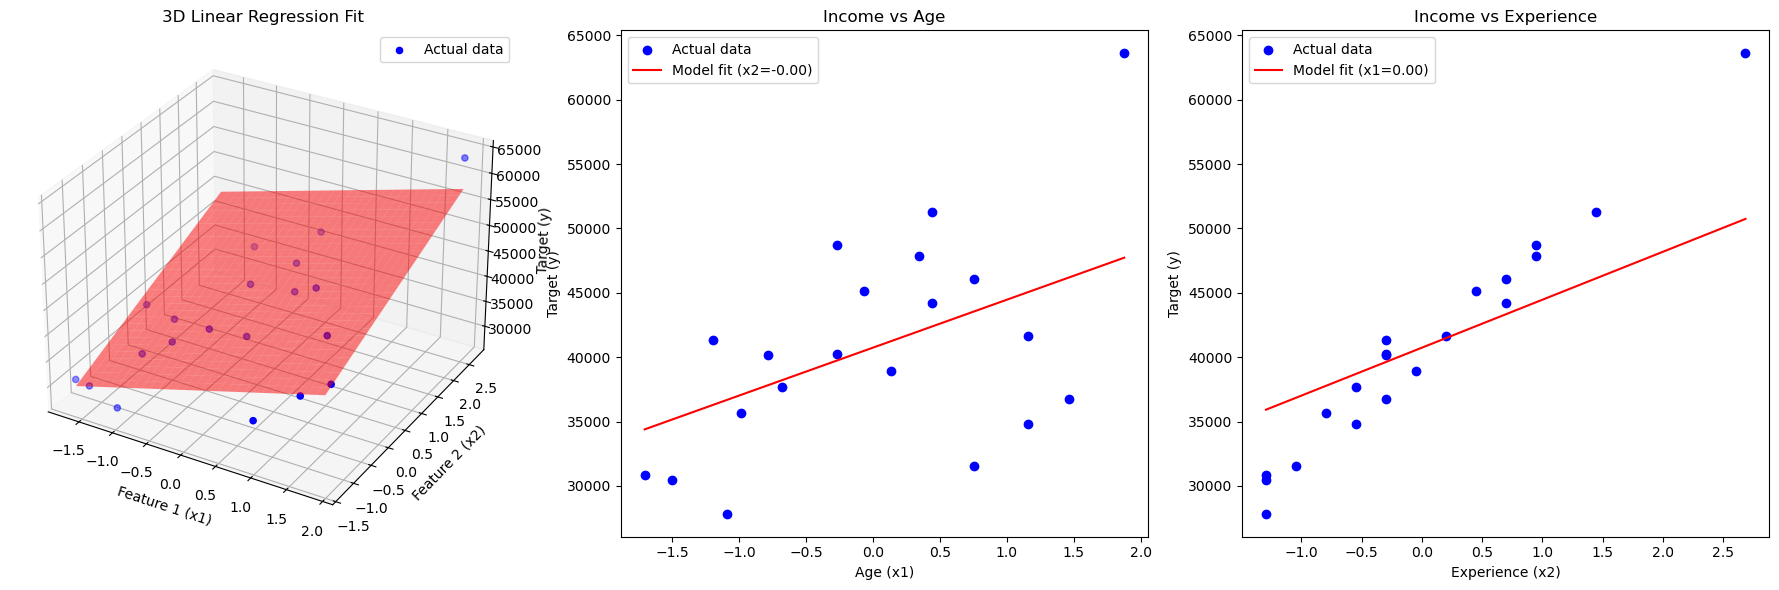

In [458]:
# plot the linear regression model along with the data set - assisted by chat-GPT

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example: replace these with your actual data
print(x[:,1])
x1 = normalised_x1 # feature 1 values
x2 = normalised_x2 # feature 2 values
y = y  # target values

# Your trained model parameters
w1 = w[0]  # weight for x1
w2 = w[1]  # weight for x2

# --- Create grid for regression plane ---
x1_grid, x2_grid = np.meshgrid(
    np.linspace(min(x1), max(x1), 30),
    np.linspace(min(x2), max(x2), 30)
)

# Predicted y from regression plane
y_pred_plane = w1 * x1_grid + w2 * x2_grid + b

# needs to be un-normalised
y_pred_plane = (y_pred_plane * np.std(y)) + np.mean(y)

# --- Create figure with subplots ---
fig = plt.figure(figsize=(18, 6))  # Wider layout for 3 plots

# ---- 3D PLOT: regression plane ----
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x1, x2, y, color='blue', label='Actual data')
ax1.plot_surface(x1_grid, x2_grid, y_pred_plane, alpha=0.5, color='red')
ax1.set_xlabel('Feature 1 (x1)')
ax1.set_ylabel('Feature 2 (x2)')
ax1.set_zlabel('Target (y)')
ax1.set_title('3D Linear Regression Fit')
ax1.legend()

# ---- 2D PLOT: y vs x1 ----
ax2 = fig.add_subplot(132)
ax2.scatter(x1, y, color='blue', label='Actual data')
x1_line = np.linspace(min(x1), max(x1), 100)
x2_mean = np.mean(x2)
y_fit_x1 = w1 * x1_line + w2 * x2_mean + b
y_fit_x1 = (y_fit_x1 * np.std(y)) + np.mean(y)
ax2.plot(x1_line, y_fit_x1, color='red', label=f'Model fit (x2={x2_mean:.2f})')
ax2.set_xlabel('Age (x1)')
ax2.set_ylabel('Target (y)')
ax2.set_title('Income vs Age')
ax2.legend()

# ---- 2D PLOT: y vs x2 ----
ax3 = fig.add_subplot(133)
ax3.scatter(x2, y, color='blue', label='Actual data')
x2_line = np.linspace(min(x2), max(x2), 100)
x1_mean = np.mean(x1)
y_fit_x2 = w1 * x1_mean + w2 * x2_line + b
y_fit_x2 = (y_fit_x2 * np.std(y)) + np.mean(y)
ax3.plot(x2_line, y_fit_x2, color='red', label=f'Model fit (x1={x1_mean:.2f})')
ax3.set_xlabel('Experience (x2)')
ax3.set_ylabel('Target (y)')
ax3.set_title('Income vs Experience')
ax3.legend()

plt.tight_layout()
plt.show()
